# Example augmentation usage

In [31]:
import skimage
import albumentations_3d.augmentations as aug
import matplotlib.pyplot as plt 

In [32]:
image = skimage.io.imread("./data/image_patch.tiff")
mask = skimage.io.imread("./data/mask_patch.tiff")[0,...] # Remove channel dim in these images
weight_map = skimage.io.imread("./data/weight_map_patch.tiff")[0,...]

data = {
    "image": image,
    "mask": mask,
    "weight_map": weight_map
}

In [33]:
def plot_fn(data, aug_data, z=4):
    fig, ax = plt.subplots(2, 3, figsize=(7.5, 5))
    z = 4
    ax[0,0].imshow(data["image"][0,z,...])
    ax[0,1].imshow(data["mask"][z,...])
    ax[0,2].imshow(data["weight_map"][z,...])
    ax[1,0].imshow(aug_data["image"][0,z,...])
    ax[1,1].imshow(aug_data["mask"][z,...])
    ax[1,2].imshow(aug_data["weight_map"][z,...])

    ax[0,0].set_title("Image")
    ax[0,1].set_title("Mask")
    ax[0,2].set_title("Weight map")
    ax[1,0].set_title("Augmented image")
    ax[1,1].set_title("Augmented mask")
    ax[1,2].set_title("Augmented weight map")

    for _ax in ax.flatten():
        _ax.axis("off")
    # return fig

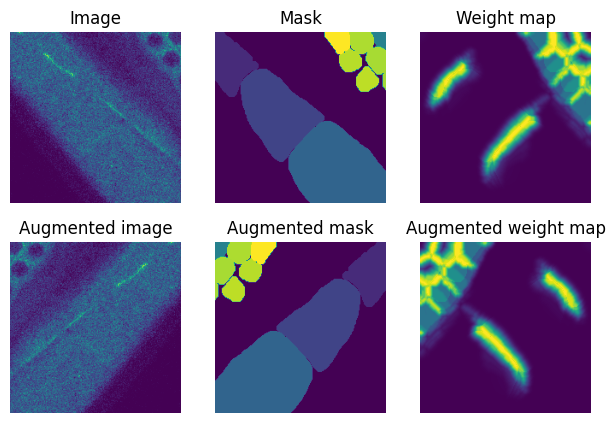

In [34]:
# Flip

augmentor = aug.Flip(p=1)

aug_data = augmentor(**data, targets=list(data.keys()))

plot_fn(data, aug_data)

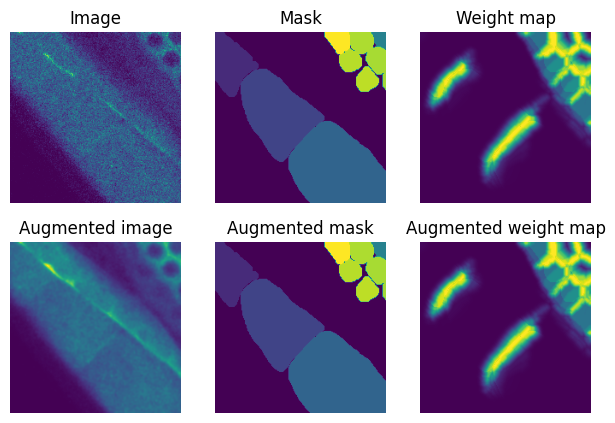

In [35]:
# Blur

augmentor = aug.RandomGuassianBlur(sigma_range=[0, 5], p=1)

aug_data = augmentor(**data, targets=list(data.keys()))

plot_fn(data, aug_data)

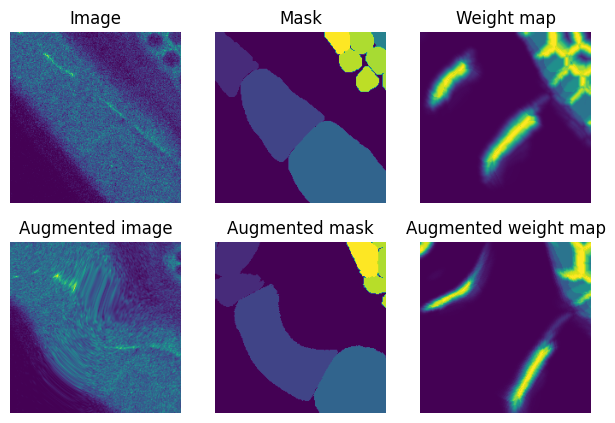

In [36]:
# ElasticDeform

augmentor = aug.ElasticDeform(
    channel_axis=0, # If the input image is multichannel, note its axis here
    sigma=25, # Deformation sigma
    points=3, # Deformation grid dimensions
    mode="mirror", # Border mode
    axis=(1, 2), # Define (spatial) axes to perform deformation. (1, 2) for x and y only since z is shallow
    p=1,
    )

aug_data = augmentor(**data, targets=[['image'], ['mask'], ["weight_map"]])

plot_fn(data, aug_data)

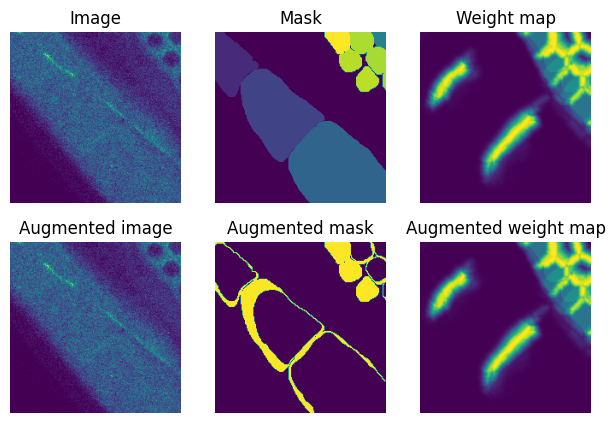

In [37]:
# LabelsToEdges

augmentor = aug.LabelsToEdges(
    mode="inner", # Boundary mode
    connectivity=2 # Pixel connectivity to draw boundary
    )

aug_data = augmentor(**data, targets=[['image'], ['mask'], ["weight_map"]])

plot_fn(data, aug_data)

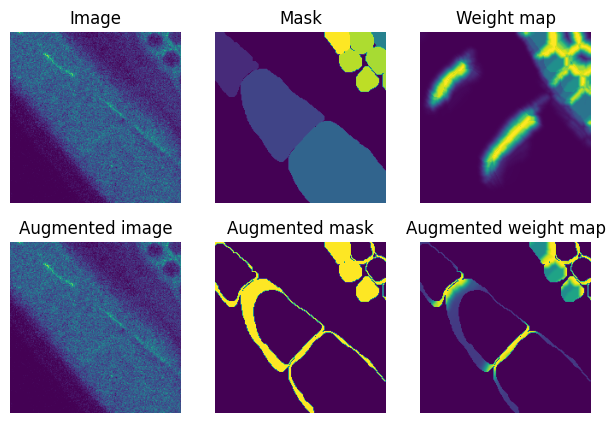

In [41]:
# Applying weightmap to masks

augmentor = aug.Compose(
    [
        aug.LabelsToEdges(mode="inner"),
        aug.EdgeMaskWmap(
            edge_multiplier=1, 
            wmap_multiplier=5, 
            invert_wmap=False
    )],
    targets=list(data.keys())
    )

aug_data = augmentor(**data)

plot_fn(data, aug_data)

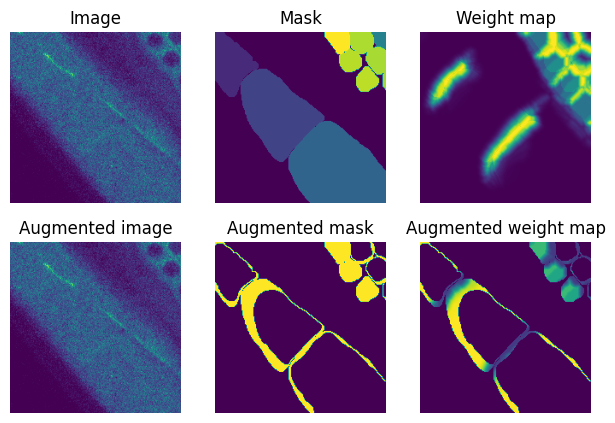

In [42]:
# Applying weightmap to masks

augmentor = aug.Compose(
    [
        aug.LabelsToEdges(mode="inner"),
        aug.EdgeMaskWmap(
            edge_multiplier=1, 
            wmap_multiplier=5, 
            invert_wmap=True
    )],
    targets=list(data.keys())
    )

aug_data = augmentor(**data)

plot_fn(data, aug_data)

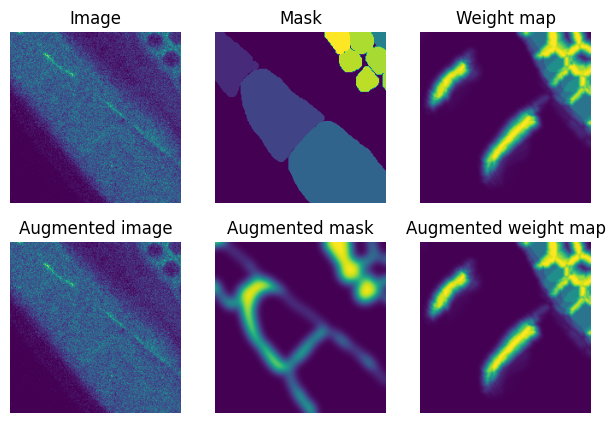

In [43]:
# BlurMasks

augmentor = aug.Compose(
    [
        aug.LabelsToEdges(mode="inner"),
        aug.BlurMasks(
            sigma=5
    )],
    targets=list(data.keys())
    )

aug_data = augmentor(**data)

plot_fn(data, aug_data)